In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score

df = pd.read_csv('diabetes_data_upload.csv')
df.head()

Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      Yes     Yes  Positive  
1             Yes               No      Yes      No  Positive  
2              No              Yes      Yes      No  Positive  
3              No               No       No      No  Positive  
4             Yes              Yes      Yes     Yes  Positive

In [9]:
# Get the number of rows and columns
rows = len(df.axes[0])
cols = len(df.axes[1])
  
# Print the number of rows and columns
print("Number of Rows: " + str(rows))
print("Number of Columns: " + str(cols))

Number of Rows: 520
Number of Columns: 17


In [10]:
# Get the column variable
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

In [11]:
# Test if missing value exist
df.isna().any()

Age                   False
Gender                False
Polyuria              False
Polydipsia            False
sudden weight loss    False
weakness              False
Polyphagia            False
Genital thrush        False
visual blurring       False
Itching               False
Irritability          False
delayed healing       False
partial paresis       False
muscle stiffness      False
Alopecia              False
Obesity               False
class                 False
dtype: bool

In [17]:
# show the description of the data

df.describe(include="all")

Age      Gender    Polyuria  Polydipsia  sudden weight loss  \
count  520.000000  520.000000  520.000000  520.000000          520.000000   
mean    48.028846    0.369231    0.496154    0.448077            0.417308   
std     12.151466    0.483061    0.500467    0.497776            0.493589   
min     16.000000    0.000000    0.000000    0.000000            0.000000   
25%     39.000000    0.000000    0.000000    0.000000            0.000000   
50%     47.500000    0.000000    0.000000    0.000000            0.000000   
75%     57.000000    1.000000    1.000000    1.000000            1.000000   
max     90.000000    1.000000    1.000000    1.000000            1.000000   

         weakness  Polyphagia  Genital thrush  visual blurring     Itching  \
count  520.000000  520.000000      520.000000       520.000000  520.000000   
mean     0.586538    0.455769        0.223077         0.448077    0.486538   
std      0.492928    0.498519        0.416710         0.497776    0.500300   
min      0.000000    0.000000        0.000000         0.000000    0.000000   
25%      0.000000    0.000000        0.000000         0.000000    0.000000   
50%      1.000000    0.000000        0.000000         0.000000    0.000000   
75%      1.000000    1.000000        0.000000         1.000000    1.000000   
max      1.000000    1.000000        1.000000         1.000000    1.000000   

       Irritability  delayed healing  partial paresis  muscle stiffness  \
count    520.000000       520.000000       520.000000        520.000000   
mean       0.242308         0.459615         0.430769          0.375000   
std        0.428892         0.498846         0.495661          0.484589   
min        0.000000         0.000000         0.000000          0.000000   
25%        0.000000         0.000000         0.000000          0.000000   
50%        0.000000         0.000000         0.000000          0.000000   
75%        0.000000         1.000000         1.000000          1.000000   
max        1.000000         1.000000         1.000000          1.000000   

         Alopecia     Obesity       class  
count  520.000000  520.000000  520.000000  
mean     0.344231    0.169231    0.615385  
std      0.475574    0.375317    0.486973  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    1.000000  
75%      1.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000

In [13]:
df.isnull().any().any()

False

In [14]:

# Mapping for Gender
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Mapping for Yes/No Data
binary_columns = ['Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness', 'Polyphagia', 'Genital thrush',
                  'visual blurring', 'Itching', 'Irritability', 'delayed healing', 'partial paresis', 'muscle stiffness',
                  'Alopecia', 'Obesity']

for column in binary_columns:
    df[column] = df[column].map({'No': 0, 'Yes': 1})

# Mapping for Positive/Negative Data
df['class'] = df['class'].map({'Negative': 0, 'Positive': 1})
df.head()

Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0   40       0         0           1                   0         1   
1   58       0         0           0                   0         1   
2   41       0         1           0                   0         1   
3   45       0         0           0                   1         1   
4   60       0         1           1                   1         1   

   Polyphagia  Genital thrush  visual blurring  Itching  Irritability  \
0           0               0                0        1             0   
1           0               0                1        0             0   
2           1               0                0        1             0   
3           1               1                0        1             0   
4           1               0                1        1             1   

   delayed healing  partial paresis  muscle stiffness  Alopecia  Obesity  \
0                1                0                 1         1        1   
1                0                1                 0         1        0   
2                1                0                 1         1        0   
3                1                0                 0         0        0   
4                1                1                 1         1        1   

   class  
0      1  
1      1  
2      1  
3      1  
4      1

<Axes: >

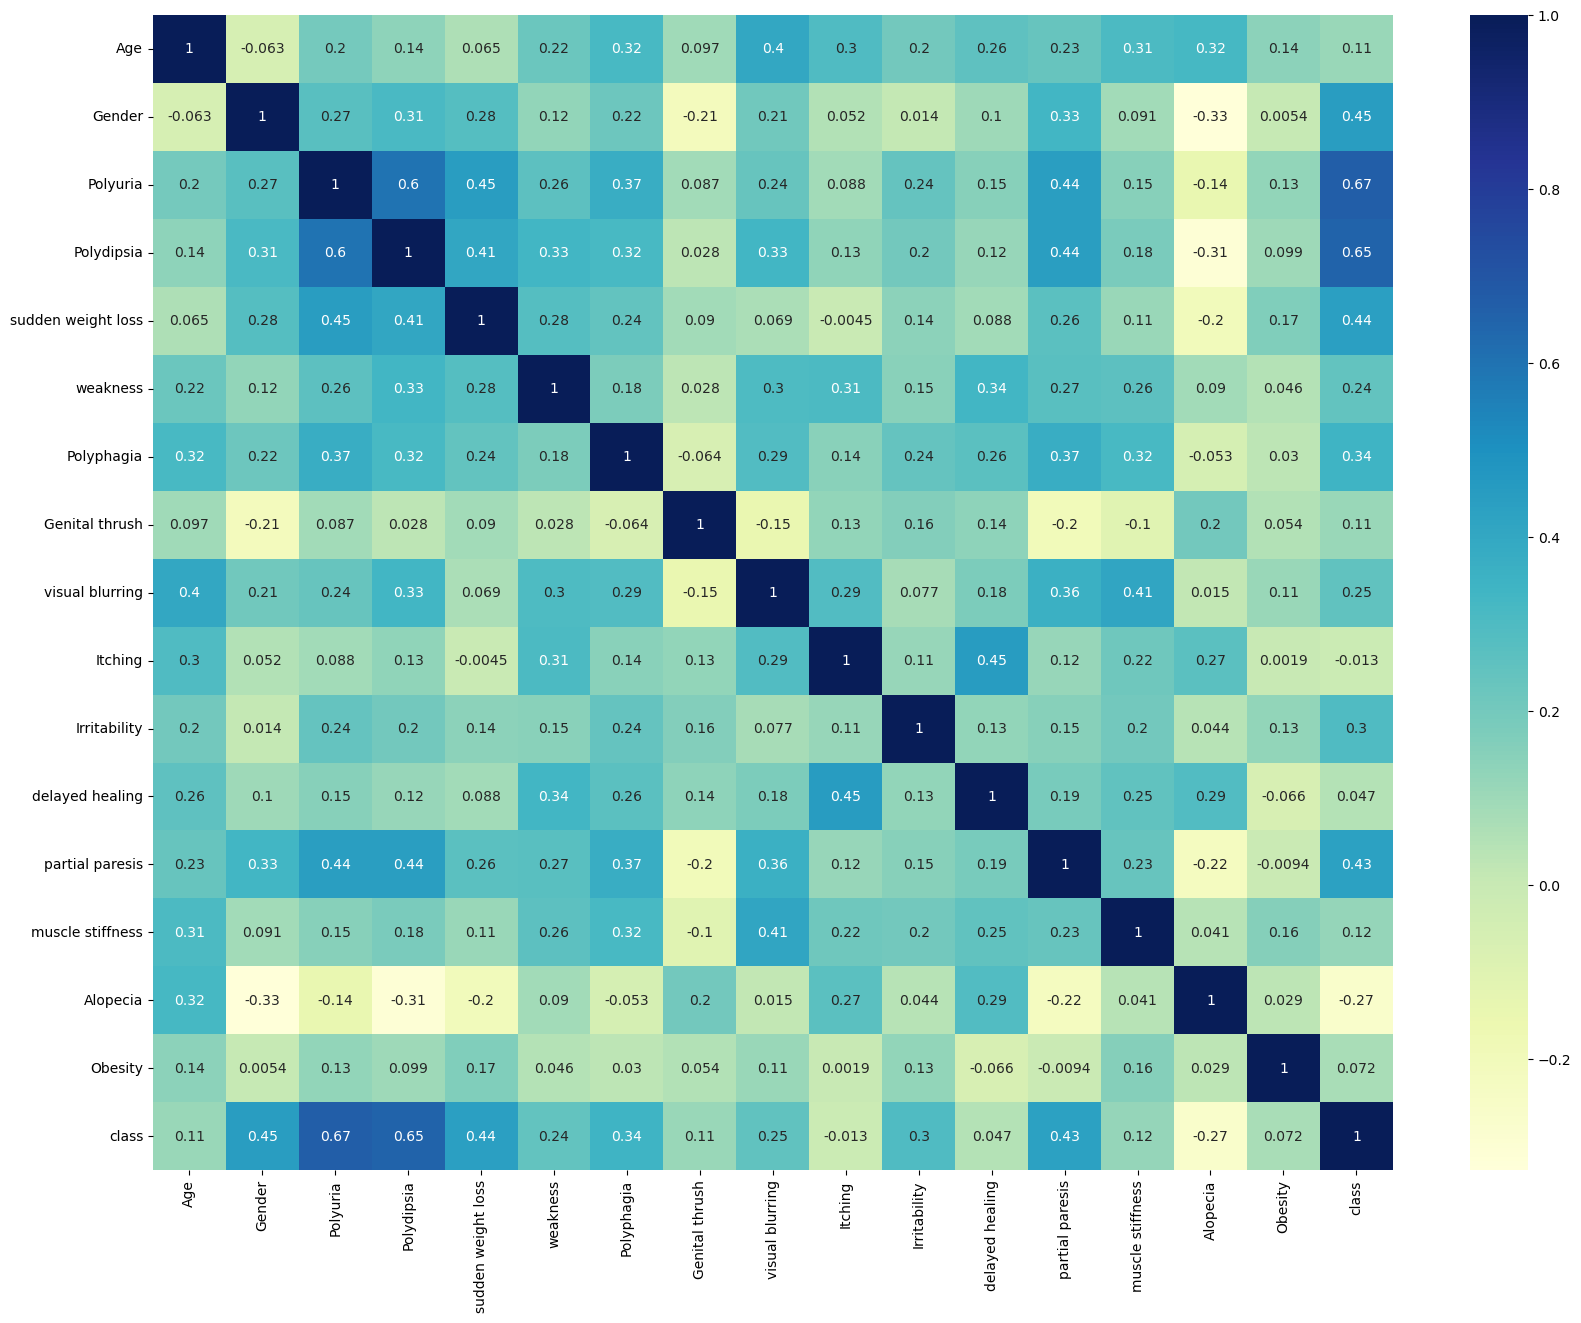

In [13]:

# Display the heatmap
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [14]:
correlation_with_class = df.corr()['class'].abs().sort_values(ascending=False)

print(correlation_with_class)

class                 1.000000
Polyuria              0.665922
Polydipsia            0.648734
Gender                0.449233
sudden weight loss    0.436568
partial paresis       0.432288
Polyphagia            0.342504
Irritability          0.299467
Alopecia              0.267512
visual blurring       0.251300
weakness              0.243275
muscle stiffness      0.122474
Genital thrush        0.110288
Age                   0.108679
Obesity               0.072173
delayed healing       0.046980
Itching               0.013384
Name: class, dtype: float64


In [47]:
# p_values = []
# for column in df.drop(columns=['class']):
#     feature_positive = df[df['class'] == 1][column]
#     feature_negative = df[df['class'] == 0][column]
#     _, p_value = ttest_ind(feature_positive, feature_negative)
#     p_values.append((column, p_value))

# # Select columns with p-value less than a significance level (e.g., 0.05)
# significant_columns = [col for col, p_value in p_values if p_value < 0.05]

# # Keep only the significant columns
# df = df[['class'] + significant_columns]

# print(df)

     class  Age  Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0        1   40       0         0           1                   0         1   
1        1   58       0         0           0                   0         1   
2        1   41       0         1           0                   0         1   
3        1   45       0         0           0                   1         1   
4        1   60       0         1           1                   1         1   
..     ...  ...     ...       ...         ...                 ...       ...   
515      1   39       1         1           1                   1         0   
516      1   48       1         1           1                   1         1   
517      1   58       1         1           1                   1         1   
518      0   32       1         0           0                   0         1   
519      0   42       0         0           0                   0         0   

     Polyphagia  Genital thrush  visual blurring  I

In [20]:
from sklearn.linear_model import LogisticRegression

X = df.drop(columns=['class'])  # Features (excluding the target variable)
y = df['class']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the linear regression model
model = LogisticRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)


# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9230769230769231


c:\Users\ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


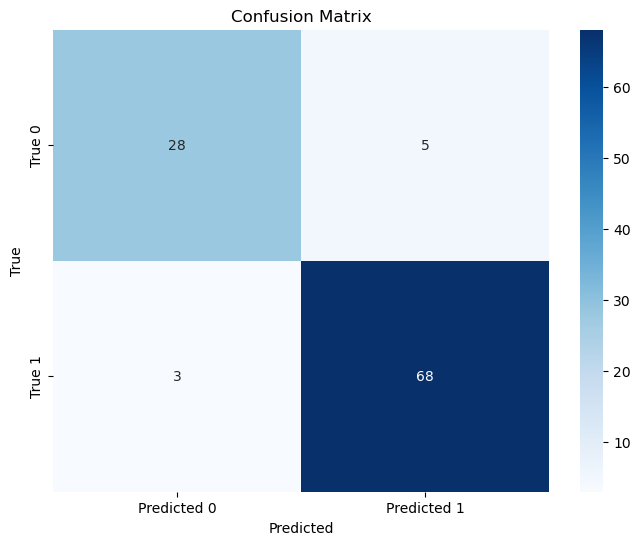

In [24]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["True 0", "True 1"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()